# Momentum Resolution

The [ATLAS TDR](https://cds.cern.ch/record/391176/files/cer-0317330.pdf) gives the momentum resolution on $\frac{1}{p_T}$

$$\sigma \left( \frac{1}{p_T} \right) = 0.36 \oplus \frac{13}{p_T \sqrt{\sin \theta}} [\text{TeV}^{-1}]$$


$$\sigma (p_T) = p_T^2 \cdot \sigma \left( \frac{1}{p_T} \right)$$


In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [102]:
calc_eta = lambda theta: - np.log(np.tan(theta / 2))
calc_theta = lambda eta: 2 * np.arctan( np.exp(- eta))

calc_sigma_pt_inv = lambda pt, theta: np.sqrt(0.36**2 + np.power(13 / pt,2) / np.sin(theta)) # TeV^-1

calc_sigma_pt = lambda pt, theta: 0.001 * np.power(pt,2) * calc_sigma_pt_inv(pt, theta) # GeV


**Goal #1:** When is it ok to approximate $\sigma \left( \frac{1}{p_T} \right) \sim \frac{1}{p_T}$

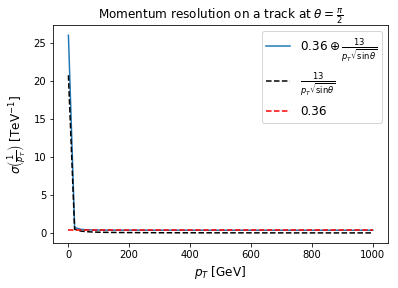

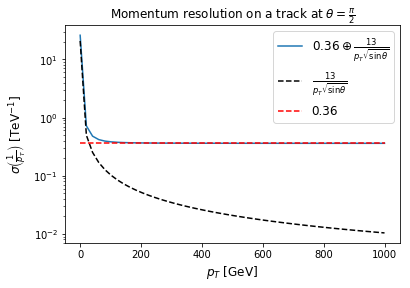

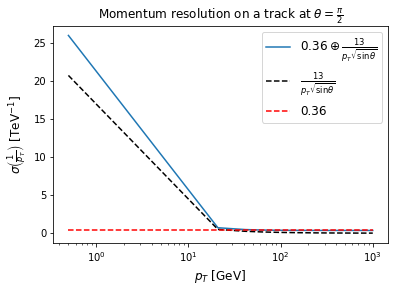

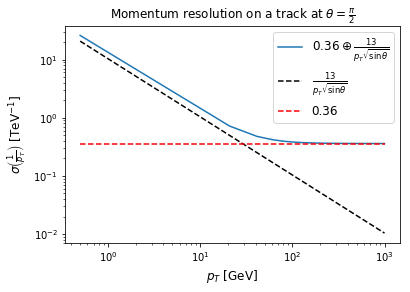

In [62]:
pts = np.linspace(.5, 1000) # GeV
theta = np.pi / 2

for fct in [plt.plot,plt.semilogy,plt.semilogx,plt.loglog]:
    
    plt.figure()
    fct(pts,calc_sigma_pt_inv(pts,theta),'C0',label=r'$0.36 \oplus \frac{13}{p_T \sqrt{\sin \theta}}$')
    fct(pts,13 / (pts * np.sqrt(theta)),'k--',label=r'$\frac{13}{p_T \sqrt{\sin \theta}}$')
    fct(pts,0.36*np.ones_like(pts),'r--',label='0.36')

    plt.xlabel('$p_T$ [GeV]',fontsize=12)
    plt.ylabel(r'$\sigma \left( \frac{1}{p_T} \right)$'+' [TeV$^{-1}$]',fontsize=12)
    plt.title(r'Momentum resolution on a track at $\theta = \frac{\pi}{2}$',fontsize=12)
    plt.legend(fontsize=12)
    
plt.show()

I don't understand why this 0.36 term is here at all in the equation... *when* is it relevant?

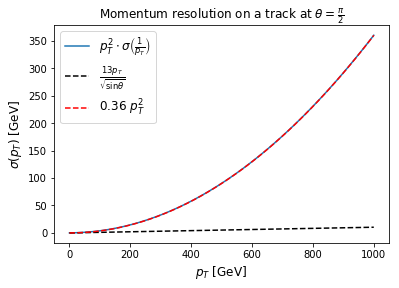

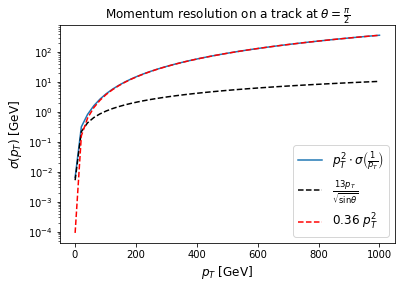

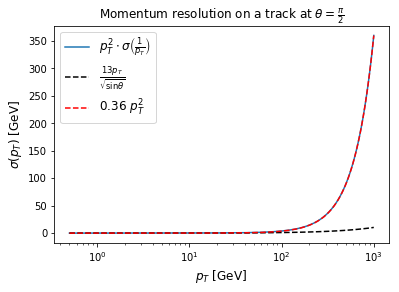

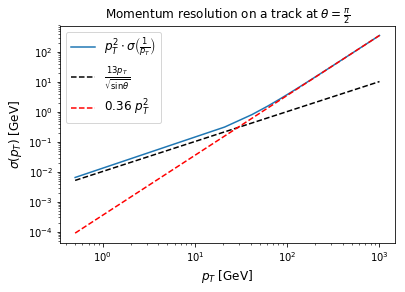

In [64]:
for fct in [plt.plot,plt.semilogy,plt.semilogx,plt.loglog]:
    
    plt.figure()
    fct(pts,calc_sigma_pt(pts,theta),'C0',label=r'$p_T^2 \cdot \sigma \left( \frac{1}{p_T} \right)$')
    fct(pts,0.001*np.power(pts,2)*13 / (pts * np.sqrt(theta)),'k--',label=r'$\frac{13 p_T}{\sqrt{\sin \theta}}$')
    fct(pts,0.001*np.power(pts,2)*0.36,'r--',label='0.36 $p_T^2$')

    plt.xlabel('$p_T$ [GeV]',fontsize=12)
    plt.ylabel(r'$\sigma (p_T)$ [GeV]',fontsize=12)
    plt.title(r'Momentum resolution on a track at $\theta = \frac{\pi}{2}$',fontsize=12)
    plt.legend(fontsize=12)
    
plt.show()

**Goal:** Find the momentum resolution on a 100 GeV, 500 GeV, and 1 TeV track!

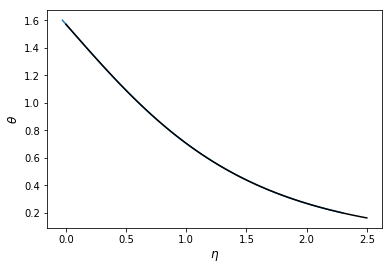

In [99]:
thetas = np.linspace(.2,1.6)
etas = calc_eta(thetas)
plt.plot(etas,thetas,'C0')
plt.xlabel(r'$\eta$',fontsize=12)
plt.ylabel(r'$\theta$',fontsize=12)

etas = np.linspace(0,2.5)
thetas = calc_theta(etas)

plt.plot(etas,thetas,'k')
plt.xlabel(r'$\eta$',fontsize=12)
plt.ylabel(r'$\theta$',fontsize=12)
plt.show()

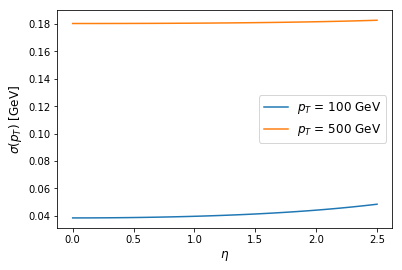

In [96]:
plt.figure()

for pt in [100,500]: # GeV
    
    plt.plot(etas,calc_sigma_pt(pt,thetas),label='$p_T$ = {} GeV'.format(pt))    

plt.xlabel('$\eta$',fontsize=12)
plt.ylabel(r'$\sigma (p_T)$ [GeV]',fontsize=12)
#plt.title(r'Momentum resolution for a track with $p_T$ = {} TeV'.format(pt),fontsize=12)
plt.legend(fontsize=12)
# _,ymax = plt.ylim()
# plt.ylim(1,ymax)

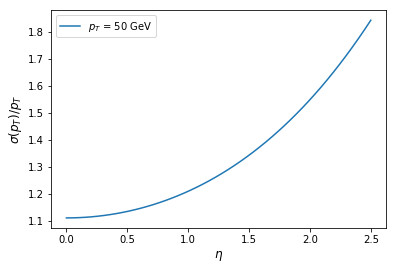

In [106]:
pt = 50
plt.plot(etas,calc_sigma_pt(pt,thetas),label='$p_T$ = {} GeV'.format(pt))    

plt.xlabel('$\eta$',fontsize=12)
plt.ylabel(r'$\sigma (p_T) / p_T$',fontsize=12)
plt.legend()
plt.show()

Ok, something's *wrong* w/ my formula, I still am not getting similar results to the alignment paper.

In [91]:
?pd.DataFrame

In [93]:
my_pts = [100,500,1000,5000]
theta = np.pi / 2
index = ['$p_T$ = {} GeV'.format(pt) for pt in my_pts]
vals = [calc_sigma_pt(pt,theta) for pt in my_pts]
pt_res = pd.DataFrame(vals,index=index,columns=['$\sigma (p_T)$ [GeV]'])

pt_res

$\sigma (p_T)$ [GeV]
$p_T$ = 100 GeV               3.827532
$p_T$ = 500 GeV              90.234417
$p_T$ = 1000 GeV            360.234646
$p_T$ = 5000 GeV           9000.234719

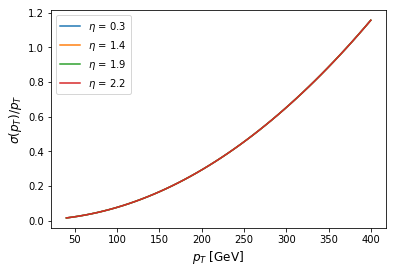

In [109]:
eta = 0.3
pts = np.linspace(40,400)
for eta in [0.3,1.4,1.9,2.2]:
    plt.plot(pts,calc_sigma_pt(pts,calc_theta(0.3))/pt, label='$\eta$ = {}'.format(eta))
plt.xlabel('$p_T$ [GeV]',fontsize=12)
plt.ylabel(r'$\sigma (p_T) / p_T$',fontsize=12)
plt.legend()
plt.show()

In [ ]:
calc_pt_res = lambda pt: 0.36